In [22]:
import pandas as pd
import json
import os

base_directory = './../results'  

# Diccionario para almacenar los DataFrames según los nombres de los archivos
dataframes = {}

# Función para recorrer la estructura de carpetas recursivamente
def process_json_files(directory):
    for root, dirs, files in os.walk(directory):
        # Ignorar carpetas llamadas 'capturas_impactos'
        if 'capturas_impactos' in root:
            continue

        for file_name in files:
            if file_name.endswith('.json'):  # Procesar solo archivos JSON
                file_path = os.path.join(root, file_name)

                # Cargar los datos del archivo JSON
                with open(file_path, 'r') as f:
                    try:
                        json_data = json.load(f)
                    except json.JSONDecodeError as e:
                        print(f"Error al leer {file_path}: {e}")
                        continue

                # Crear una lista para los datos del archivo actual
                data = []
                for mode, videos in json_data.items():
                    for video, impacts in videos.items():
                        for impact_id, impact_data in impacts.items():
                            time = impact_data['Time [s]']
                            velocity = impact_data['Velocity [m/s]']
                            data.append({
                                'Mode': mode,
                                'Video': video,
                                'Impact ID': impact_id,
                                'Time [s]': time,
                                'Velocity [m/s]': velocity
                            })

                # Crear un DataFrame para este archivo
                df = pd.DataFrame(data)

                # Usar el nombre del archivo (sin extensión) como clave
                file_key = os.path.splitext(file_name)[0]
                dataframes[file_key] = df

# Llamar a la función para procesar los archivos
process_json_files(base_directory)

# Mostrar ejemplos de los DataFrames creados
if dataframes:
    for key, df in dataframes.items():
        print(f"DataFrame para el archivo: {key}")
        print(df.head())
        print("\n")
else:
    print("No se encontraron archivos JSON.")


DataFrame para el archivo: kalman_threshold20
       Mode                             Video Impact ID   Time [s]  \
0  NFOV_2X2  boca_NFOV_2x2_luz_artificial.mkv         1   3.433333   
1  NFOV_2X2  boca_NFOV_2x2_luz_artificial.mkv         2   5.366667   
2  NFOV_2X2  boca_NFOV_2x2_luz_artificial.mkv         3   9.133333   
3  NFOV_2X2  boca_NFOV_2x2_luz_artificial.mkv         4  10.266667   
4  NFOV_2X2  boca_NFOV_2x2_luz_artificial.mkv         5  12.700000   

   Velocity [m/s]  
0        0.335919  
1        1.999549  
2        1.356100  
3        1.563318  
4        1.491851  


DataFrame para el archivo: kalman_threshold30
       Mode                             Video Impact ID   Time [s]  \
0  NFOV_2X2  boca_NFOV_2x2_luz_artificial.mkv         1   3.100000   
1  NFOV_2X2  boca_NFOV_2x2_luz_artificial.mkv         2   5.333333   
2  NFOV_2X2  boca_NFOV_2x2_luz_artificial.mkv         3   7.733333   
3  NFOV_2X2  boca_NFOV_2x2_luz_artificial.mkv         4   9.066667   
4  NFOV_2X2  bo

In [45]:
dataframes["kalman_threshold40"].head(50)

,Mode,Video,Impact ID,Time [s],Velocity [m/s]
0,NFOV_2X2,boca_NFOV_2x2_luz_artificial.mkv,1,1.866667,2.478479
1,NFOV_2X2,boca_NFOV_2x2_luz_artificial.mkv,2,3.066667,1.649344
2,NFOV_2X2,boca_NFOV_2x2_luz_artificial.mkv,3,4.200000,2.903980
3,NFOV_2X2,boca_NFOV_2x2_luz_artificial.mkv,4,5.333333,2.393259
4,NFOV_2X2,boca_NFOV_2x2_luz_artificial.mkv,5,6.566667,2.031602
5,NFOV_2X2,boca_NFOV_2x2_luz_artificial.mkv,6,7.733333,2.147127
6,NFOV_2X2,boca_NFOV_2x2_luz_artificial.mkv,7,8.333333,0.798613
7,NFOV_2X2,boca_NFOV_2x2_luz_artificial.mkv,8,9.033333,1.719598
8,NFOV_2X2,boca_NFOV_2x2_luz_artificial.mkv,9,10.233333,1.572080
9,NFOV_2X2,boca_NFOV_2x2_luz_artificial.mkv,10,11.433333,2.121236


C:\Users\Ilich\AppData\Local\Temp\ipykernel_21892\1311008643.py:125: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
C:\Users\Ilich\AppData\Local\Temp\ipykernel_21892\1311008643.py:137: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(axes.get_xticklabels(), rotation=45)


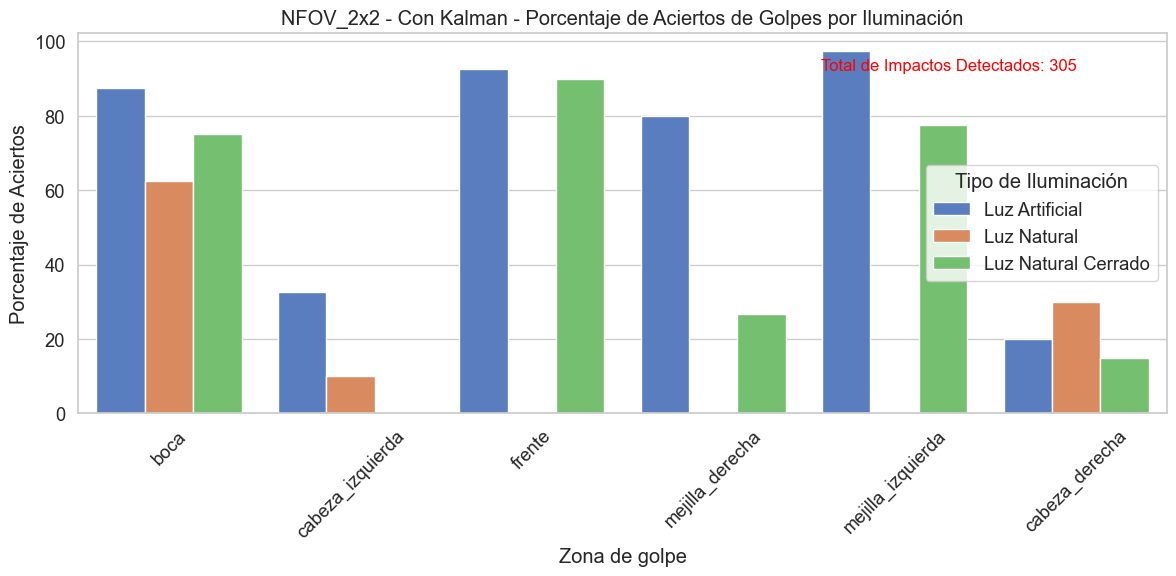

C:\Users\Ilich\AppData\Local\Temp\ipykernel_21892\1311008643.py:149: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
C:\Users\Ilich\AppData\Local\Temp\ipykernel_21892\1311008643.py:161: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(axes.get_xticklabels(), rotation=45)


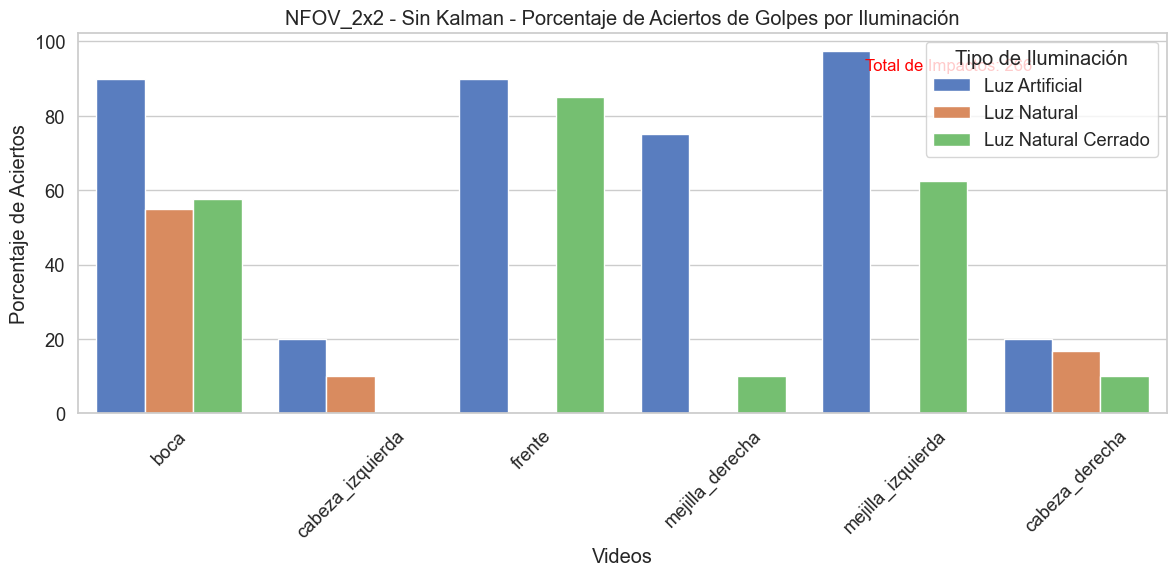

C:\Users\Ilich\AppData\Local\Temp\ipykernel_21892\1311008643.py:125: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
C:\Users\Ilich\AppData\Local\Temp\ipykernel_21892\1311008643.py:137: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(axes.get_xticklabels(), rotation=45)


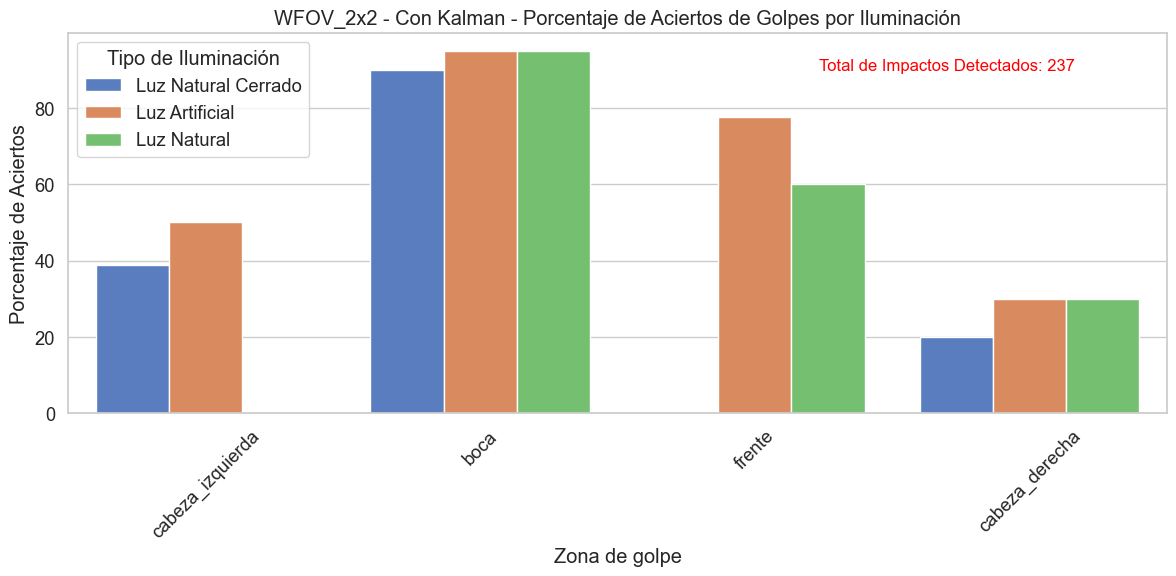

C:\Users\Ilich\AppData\Local\Temp\ipykernel_21892\1311008643.py:149: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
C:\Users\Ilich\AppData\Local\Temp\ipykernel_21892\1311008643.py:161: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(axes.get_xticklabels(), rotation=45)


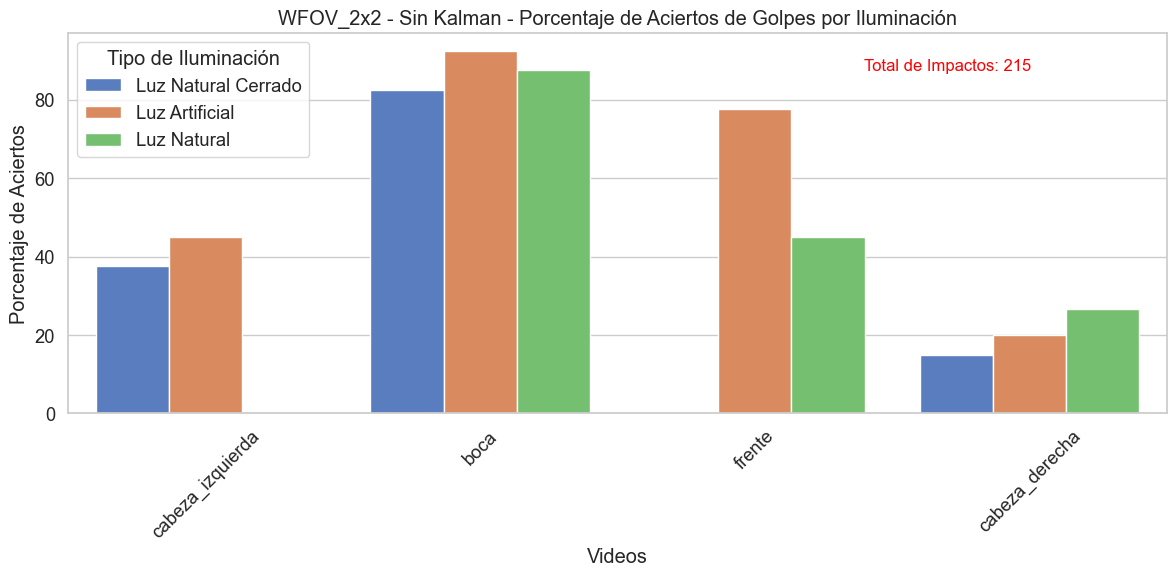

C:\Users\Ilich\AppData\Local\Temp\ipykernel_21892\1311008643.py:125: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
C:\Users\Ilich\AppData\Local\Temp\ipykernel_21892\1311008643.py:137: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(axes.get_xticklabels(), rotation=45)


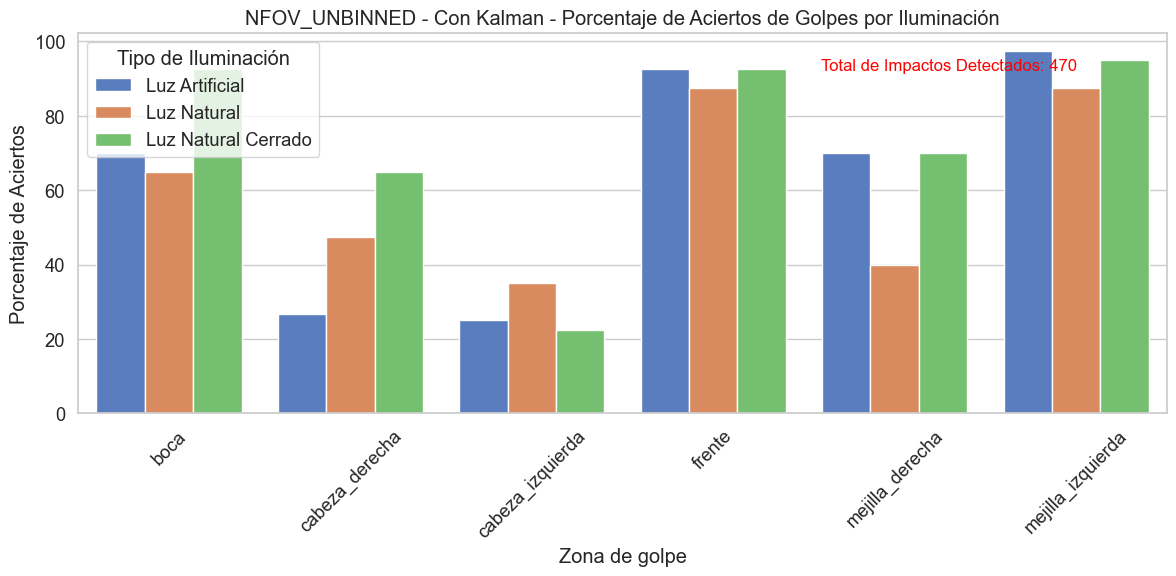

C:\Users\Ilich\AppData\Local\Temp\ipykernel_21892\1311008643.py:149: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
C:\Users\Ilich\AppData\Local\Temp\ipykernel_21892\1311008643.py:161: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(axes.get_xticklabels(), rotation=45)


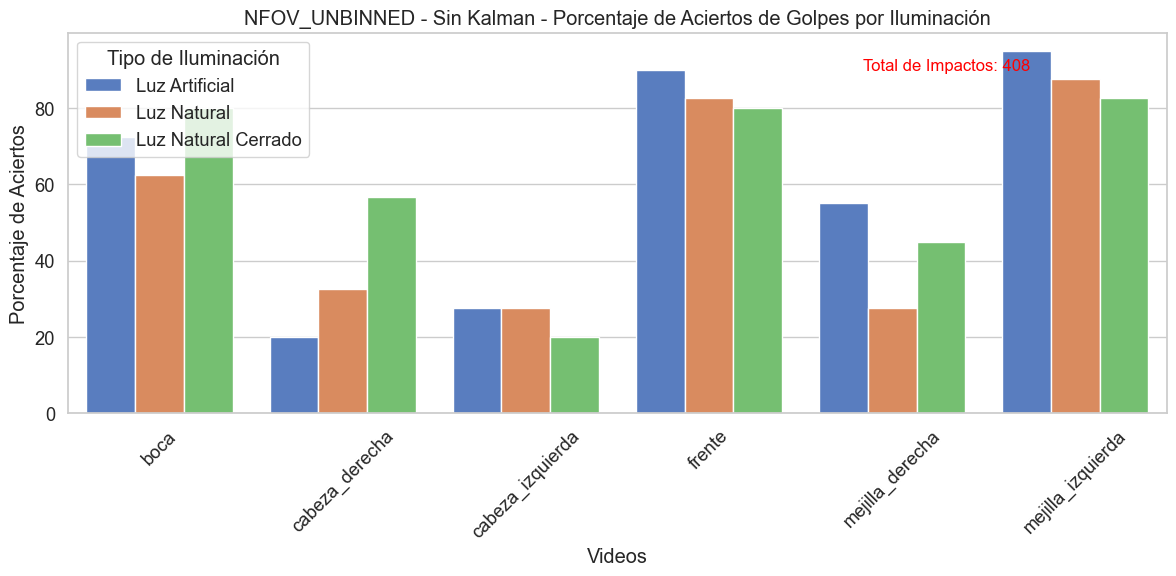

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

import re

def extraer_info_video(nombre_video, df_name, df):
    """
    Extrae información del nombre del video y del DataFrame asociado.
    
    Args:
        nombre_video (str): Nombre del archivo de video.
        df_name (str): Nombre del DataFrame asociado.
        df (pd.DataFrame): DataFrame que contiene los datos del video.
        
    Returns:
        tuple: Información extraída (nombre, modo, kalman, umbral, iluminación, stats_velocidad).
    """
    # Expresión regular para extraer la información del nombre del video, incluyendo "luz_natural_cerrado"
    match = re.match(r'([a-zA-Z0-9_]+)_([a-zA-Z0-9_]+)_([a-zA-Z0-9_]+)_([a-zA-Z0-9_]+(?:_[a-zA-Z0-9_]+)*)\.mkv', nombre_video)
    
    if match:
        # Identificar partes del cuerpo
        nombres = ['boca', 'mejilla_derecha', 'mejilla_izquierda', 'cabeza_derecha', 'cabeza_izquierda', 'frente']
        for i in nombres:
            if i in nombre_video.lower():
                nombre = i
                break

        # Identificar umbrales
        umbrales = ['20', '30', '40', '50']
        for i in umbrales:
            if i in df_name.lower():
                umbral = i
                break

        # Identificar modo de captura
        if 'NFOV_2x2' in nombre_video:
            modo = 'NFOV_2x2'
        elif 'NFOV_UNBINNED' in nombre_video:
            modo = 'NFOV_UNBINNED'
        else:
            modo = 'WFOV_2x2'

        # Identificar filtro Kalman
        kalman = 'Kalman' if 'kalman' in df_name.lower() else 'Sin Kalman'
        
        # Identificar el tipo de iluminación
        if 'luz_artificial' in nombre_video.lower():
            iluminacion = 'Luz Artificial'
        elif 'luz_natural_cerrado' in nombre_video.lower():
            iluminacion = 'Luz Natural Cerrado'
        else:
            iluminacion = 'Luz Natural'

        # Estadísticas de velocidad
        if 'Velocity [m/s]' in df.columns:
            stats_velocidad = {
                'promedio': df['Velocity [m/s]'].mean(),
                'min': df['Velocity [m/s]'].min(),
                'max': df['Velocity [m/s]'].max()
            }
        else:
            stats_velocidad = None
        
        return nombre, modo, kalman, umbral, iluminacion, stats_velocidad
    else:
        return None, None, None, None, None, None

    
sns.set_theme(style="whitegrid", palette="muted", font_scale=1.2)

#Número de impactos reales
golpes_reales = 10
resultados = []

# Iterar sobre los DataFrames y extraer la información
for key, df in dataframes.items():
    if 'Mode' in df.columns:
        for video_name in df['Video'].unique():
            nombre, modo, kalman, umbral, iluminacion, stats_velocidad = extraer_info_video(video_name, key, df)
            
            if modo and kalman and iluminacion:
                # Contar los impactos detectados
                impactos_detectados = min(len(df[df['Video'] == video_name]), golpes_reales)
                # Calcular el porcentaje de captura
                porcentaje_captura = (impactos_detectados / golpes_reales) * 100
                # Agregar el resultado a la lista
                resultados.append({
                    'Video': nombre,
                    'Configuración': modo,
                    'Uso de Kalman': kalman,
                    'Umbral': umbral,
                    'Tipo de Iluminación': iluminacion,
                    'Impactos Detectados': impactos_detectados,
                    'Porcentaje Captura': porcentaje_captura,
                    'vel prom': stats_velocidad["promedio"],
                    'vel min': stats_velocidad["min"],
                    'vel max': stats_velocidad["max"]
                })

# Crear un DataFrame con los resultados
resultados_df = pd.DataFrame(resultados)

# Filtrar los resultados para cada modo de configuración
modos = resultados_df['Configuración'].unique()

# Filtrar por "Kalman" y "Sin Kalman"
kalman_df = resultados_df[resultados_df['Uso de Kalman'] == 'Kalman']
sin_kalman_df = resultados_df[resultados_df['Uso de Kalman'] == 'Sin Kalman']

# Crear gráficos por cada modo de configuración
for modo in modos:
    # Filtrar los datos para el modo actual
    df_modo_kalman = kalman_df[kalman_df['Configuración'] == modo]
    df_modo_sin_kalman = sin_kalman_df[sin_kalman_df['Configuración'] == modo]
    
    # Crear gráficos separados por Kalman y Sin Kalman
    fig, axes = plt.subplots(1, 1, figsize=(12, 6))

    # Gráfico con Kalman
    if not df_modo_kalman.empty:
        sns.barplot(
            x='Video',
            y='Porcentaje Captura',
            hue='Tipo de Iluminación',
            data=df_modo_kalman,
            ax=axes,
            ci=None
        )
        # Anotar el total de impactos
        total_impactos = df_modo_kalman['Impactos Detectados'].sum()
        axes.annotate(f'Total de Impactos Detectados: {total_impactos}', xy=(0.8, 0.9), xycoords='axes fraction', ha='center', fontsize=12, color='red')
        axes.set_title(f'{modo} - Con Kalman - Porcentaje de Aciertos de Golpes por Iluminación')
        axes.set_xticklabels(axes.get_xticklabels(), rotation=45)
        axes.set_xlabel('Zona de golpe')
        axes.set_ylabel('Porcentaje de Aciertos')

    # Mostrar gráfico con Kalman
    plt.tight_layout()
    plt.show()

    # Gráfico sin Kalman
    if not df_modo_sin_kalman.empty:
        fig, axes = plt.subplots(1, 1, figsize=(12, 6))

        sns.barplot(
            x='Video',
            y='Porcentaje Captura',
            hue='Tipo de Iluminación',
            data=df_modo_sin_kalman,
            ax=axes,
            ci=None
        )
        # Anotar el total de impactos
        total_impactos = df_modo_sin_kalman['Impactos Detectados'].sum()
        axes.annotate(f'Total de Impactos: {total_impactos}', xy=(0.8, 0.9), xycoords='axes fraction', ha='center', fontsize=12, color='red')
        axes.set_title(f'{modo} - Sin Kalman - Porcentaje de Aciertos de Golpes por Iluminación')
        axes.set_xticklabels(axes.get_xticklabels(), rotation=45)
        axes.set_xlabel('Videos')
        axes.set_ylabel('Porcentaje de Aciertos')

        # Mostrar gráfico sin Kalman
        plt.tight_layout()
        plt.show()

C:\Users\Ilich\AppData\Local\Temp\ipykernel_21892\3007850032.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=resultados_df, x='Umbral', y='Impactos Detectados', estimator=sum, ci=None, palette='viridis')
C:\Users\Ilich\AppData\Local\Temp\ipykernel_21892\3007850032.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=resultados_df, x='Umbral', y='Impactos Detectados', estimator=sum, ci=None, palette='viridis')


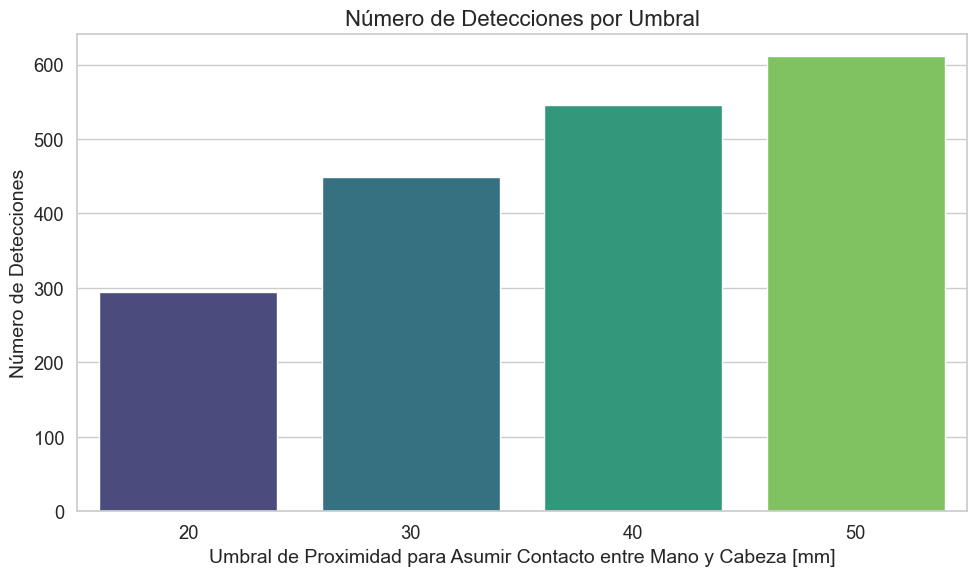

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Convertir explícitamente las columnas necesarias a tipo numérico
resultados_df['Impactos Detectados'] = pd.to_numeric(resultados_df['Impactos Detectados'], errors='coerce')
resultados_df['Umbral'] = pd.to_numeric(resultados_df['Umbral'], errors='coerce')

# Establecer el estilo de las gráficas
sns.set_theme(style="whitegrid", palette="muted", font_scale=1.2)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(data=resultados_df, x='Umbral', y='Impactos Detectados', estimator=sum, ci=None, palette='viridis')


plt.title('Número de Detecciones por Umbral', fontsize=16)
plt.xlabel('Umbral de Proximidad para Asumir Contacto entre Mano y Cabeza [mm]', fontsize=14)
plt.ylabel('Número de Detecciones', fontsize=14)

plt.tight_layout()
plt.show()

In [118]:
# Tabla de análisis por configuración con desviación estándar
tabla_configuracion = resultados_df.groupby(['Configuración', 'Uso de Kalman', 'Tipo de Iluminación']).agg({
    'Impactos Detectados': ['mean','sum'],  
    'vel prom': ['mean', 'std'],  
    'vel max': ['max']
}).reset_index()

# Renombrar las columnas para mayor claridad
tabla_configuracion.columns = [
    'Config', 'EKF', 'Illu', 
    'I.P.D', 'I.T.D.','Vel AVE', 'Vel AVE (STD)',  'Vel Max'
]


tabla_configuracion = pd.DataFrame(tabla_configuracion)


print("\nTabla de Análisis por Configuración:")
tabla_configuracion



Tabla de Análisis por Configuración con Desviación Estándar:


,Config,EKF,Illu,I.P.D,I.T.D.,Vel AVE,Vel AVE (STD),Vel Max
0,NFOV_2x2,Kalman,Luz Artificial,7.272727,160,1.950776,0.064190,5.415590
1,NFOV_2x2,Kalman,Luz Natural,3.700000,37,1.965840,0.052805,5.415590
2,NFOV_2x2,Kalman,Luz Natural Cerrado,6.352941,108,1.957926,0.060641,5.415590
3,NFOV_2x2,Sin Kalman,Luz Artificial,7.190476,151,2.459529,0.067256,8.803463
4,NFOV_2x2,Sin Kalman,Luz Natural,3.000000,30,2.477387,0.057417,8.803463
5,NFOV_2x2,Sin Kalman,Luz Natural Cerrado,5.666667,85,2.468191,0.065950,8.803463
6,NFOV_UNBINNED,Kalman,Luz Artificial,6.521739,150,1.950433,0.062736,5.415590
7,NFOV_UNBINNED,Kalman,Luz Natural,6.041667,145,1.946153,0.064840,5.415590
8,NFOV_UNBINNED,Kalman,Luz Natural Cerrado,7.291667,175,1.946153,0.064840,5.415590
9,NFOV_UNBINNED,Sin Kalman,Luz Artificial,6.173913,142,2.461859,0.066164,8.803463
